# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #original code had 0 but I changed it to 1

    # Create endpoint URL with each city
    city_url = f"{url}q={cities[i]}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
date = time.strftime("%Y-%m-%d", time.gmtime())

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | arfoud
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | nabire
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | miyanoura
City not found. Skipping...
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | ushtobe
Processing Record 15 of Set 1 | mathba
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | tukzar
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | karliova
Processin

Processing Record 40 of Set 4 | uturoa
Processing Record 41 of Set 4 | isafjordur
Processing Record 42 of Set 4 | ouddorp
Processing Record 43 of Set 4 | zabol
Processing Record 44 of Set 4 | bukan
Processing Record 45 of Set 4 | tralee
Processing Record 46 of Set 4 | ambah
Processing Record 47 of Set 4 | verden
Processing Record 48 of Set 4 | kerimaki
Processing Record 49 of Set 4 | ocean shores
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | el calafate
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | mandera
Processing Record 5 of Set 5 | wailua homesteads
Processing Record 6 of Set 5 | okha
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | kourou
Processing Record 10 of Set 5 | chibougamau
Processing Record 11 of Set 5 | arvika
Processing Record 12 of Set 5 | valdivia
Processing Record 13 of Set 5 | sur
Processing Record 14 of Set 5 | molina
Pro

Processing Record 33 of Set 8 | chifeng
Processing Record 34 of Set 8 | villa gesell
Processing Record 35 of Set 8 | izyum
Processing Record 36 of Set 8 | fuerte olimpo
Processing Record 37 of Set 8 | ronne
Processing Record 38 of Set 8 | zhanaozen
Processing Record 39 of Set 8 | maile
Processing Record 40 of Set 8 | gisborne
Processing Record 41 of Set 8 | fortuna foothills
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | inari
Processing Record 44 of Set 8 | hamamatsu
Processing Record 45 of Set 8 | tuapse
Processing Record 46 of Set 8 | baukau
Processing Record 47 of Set 8 | tofol
Processing Record 48 of Set 8 | ryotsu-minato
Processing Record 49 of Set 8 | guerrero negro
Processing Record 50 of Set 8 | kailua-kona
Processing Record 1 of Set 9 | coquimbo
Processing Record 2 of Set 9 | kayyerkan
Processing Record 3 of Set 9 | la passe
Processing Record 4 of Set 9 | makubetsu
Processing Record 5 of Set 9 | belmonte
Processing Record 6 of Set 9 | aswan
Process

Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | t'aebaek
Processing Record 27 of Set 12 | revelstoke
Processing Record 28 of Set 12 | pacific grove
Processing Record 29 of Set 12 | bowen
Processing Record 30 of Set 12 | hlusk
Processing Record 31 of Set 12 | barra de santo antonio
Processing Record 32 of Set 12 | plouzane
Processing Record 33 of Set 12 | mukah
City not found. Skipping...
Processing Record 34 of Set 12 | ngaoundere
Processing Record 35 of Set 12 | frontera
Processing Record 36 of Set 12 | gualeguaychu
Processing Record 37 of Set 12 | hami
Processing Record 38 of Set 12 | nagqu
Processing Record 39 of Set 12 | tynda
Processing Record 40 of Set 12 | dudinka
Processing Record 41 of Set 12 | kattivakkam
Processing Record 42 of Set 12 | kyabe
Processing Record 43 of Set 12 | old orchard beach
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,13.22,88,100,7.36,ZA,1687636363
1,lata,40.1629,-8.3327,22.39,69,11,1.70,PT,1687636363
2,waitangi,-43.9535,-176.5597,11.01,81,100,1.34,NZ,1687636363
3,adamstown,-25.0660,-130.1015,20.49,57,100,4.15,PN,1687636363
4,longyearbyen,78.2186,15.6401,4.91,81,75,5.14,SJ,1687636363


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,13.22,88,100,7.36,ZA,1687636363
1,lata,40.1629,-8.3327,22.39,69,11,1.70,PT,1687636363
2,waitangi,-43.9535,-176.5597,11.01,81,100,1.34,NZ,1687636363
3,adamstown,-25.0660,-130.1015,20.49,57,100,4.15,PN,1687636363
4,longyearbyen,78.2186,15.6401,4.91,81,75,5.14,SJ,1687636363


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

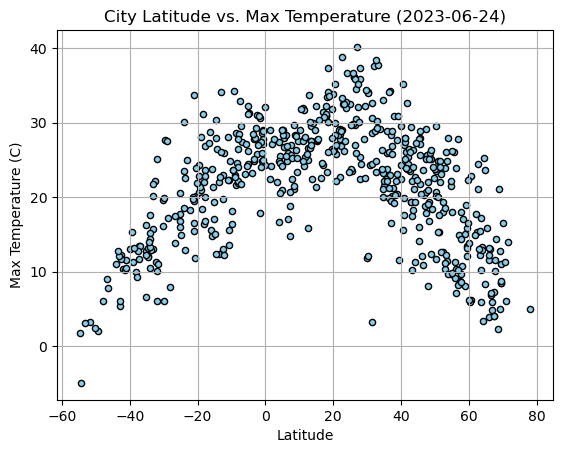

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp = city_data_df[["Lat","Max Temp"]]
lat_vs_temp.plot(kind="scatter", title=f"City Latitude vs. Max Temperature ({date})", x=["Lat"], y=["Max Temp"], c="skyblue", edgecolors="black", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

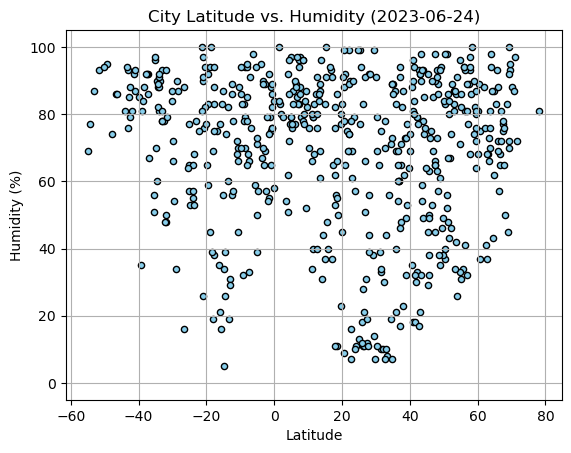

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humid = city_data_df[["Lat","Humidity"]]
lat_vs_humid.plot(kind="scatter", title=f"City Latitude vs. Humidity ({date})", x=["Lat"], y=["Humidity"], c="skyblue", edgecolors="black", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5,105)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

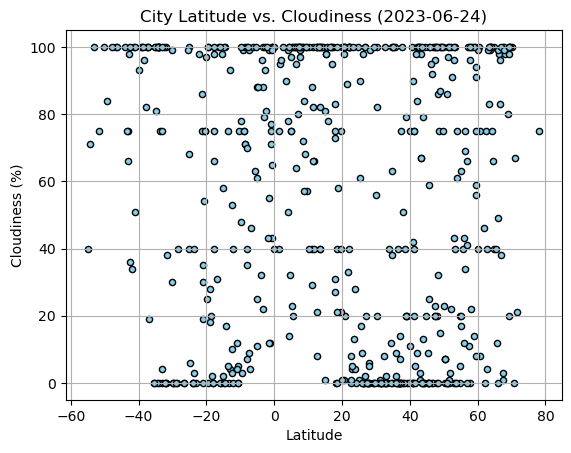

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloud = city_data_df[["Lat","Cloudiness"]]
lat_vs_cloud.plot(kind="scatter", title=f"City Latitude vs. Cloudiness ({date})", x=["Lat"], y=["Cloudiness"], c="skyblue", edgecolors="black", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

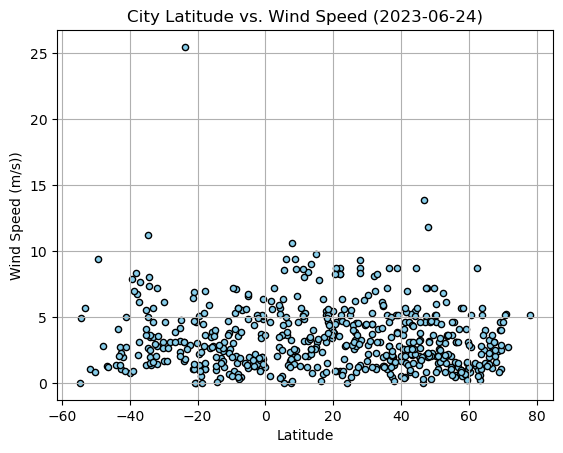

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_cloud = city_data_df[["Lat","Wind Speed"]]
lat_vs_cloud.plot(kind="scatter", title=f"City Latitude vs. Wind Speed ({date})", x=["Lat"], y=["Wind Speed"], c="skyblue", edgecolors="black", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregplot(x_val, y_val, x_lab, y_lab):
        (slope, intercept, rval, pva, stderr) = linregress(x_val, y_val)
        print(f"The r-value is: {rval}")
        y = slope * x_val + intercept
        y_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
        plt.scatter(x_val, y_val)
        plt.plot(x_val, y, "r-")
        x_pos = min(x_val) + 0.15*(max(x_val)-min(x_val))
        if slope > 0:
            y_pos = max(y_val) - 0.15*(max(y_val)-min(y_val))
        else:
            y_pos = min(y_val) + 0.15*(max(y_val)-min(y_val))
        plt.annotate(y_eq, (x_pos, y_pos), fontsize=15, color="red")
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lata,40.1629,-8.3327,22.39,69,11,1.70,PT,1687636363
4,longyearbyen,78.2186,15.6401,4.91,81,75,5.14,SJ,1687636363
5,arfoud,31.4348,-4.2375,32.67,10,0,3.69,MA,1687636364
7,enewetak,11.3474,162.3373,27.85,79,82,8.01,MH,1687636364
12,ushtobe,45.2514,77.9838,16.00,29,0,1.36,KZ,1687636365


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,13.22,88,100,7.36,ZA,1687636363
2,waitangi,-43.9535,-176.5597,11.01,81,100,1.34,NZ,1687636363
3,adamstown,-25.0660,-130.1015,20.49,57,100,4.15,PN,1687636363
6,puerto natales,-51.7236,-72.4875,3.25,93,75,1.03,CL,1687636364
8,nabire,-3.3667,135.4833,24.79,90,100,1.30,ID,1687636364


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6397309223952156


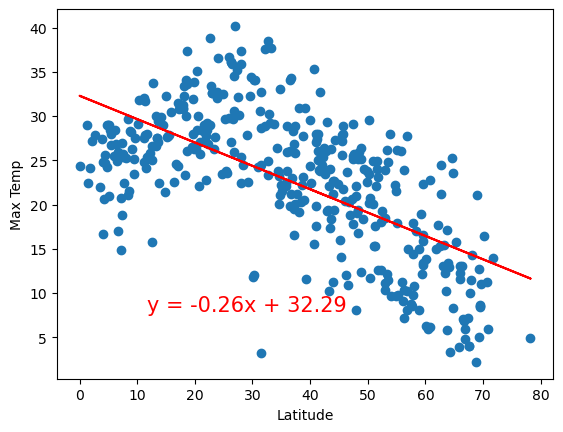

In [15]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.8009732959419819


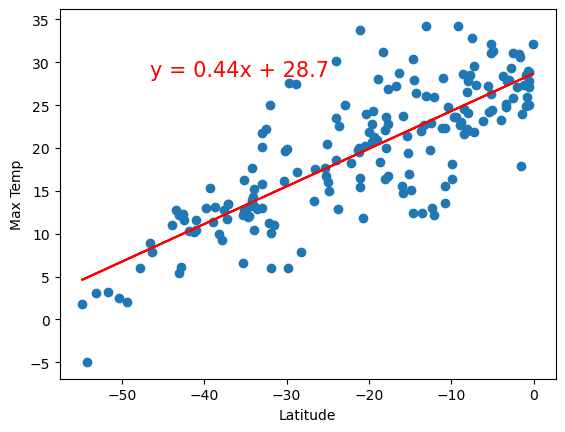

In [16]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** Latitudes and maximum temperatures have a moderate negative correlation in the northern hemisphere and a strong positive correlation in the southern hemispher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.026881956331025515


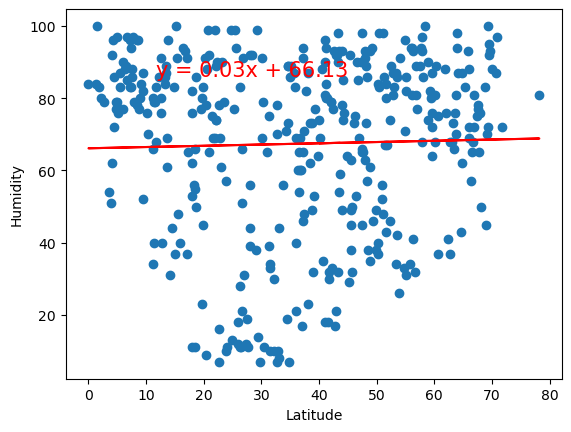

In [17]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: -0.19737367605882522


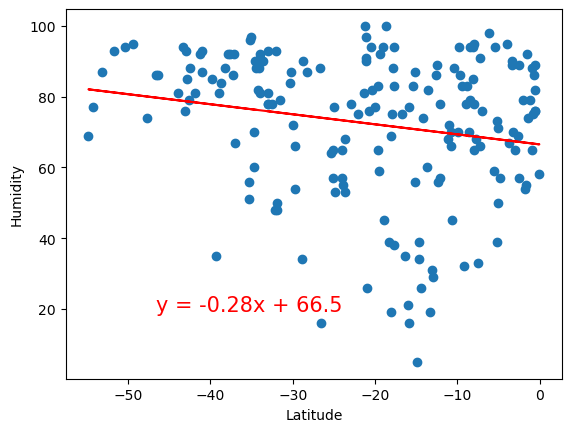

In [18]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** Latitudes and percentages of humidity have very weak correlations, reglardless of the hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09397879229341727


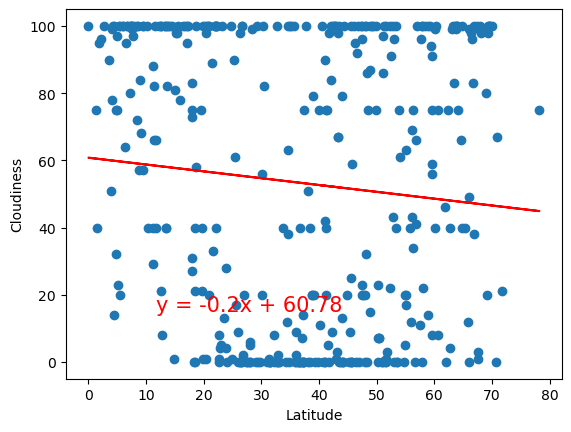

In [19]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: -0.11882435088498416


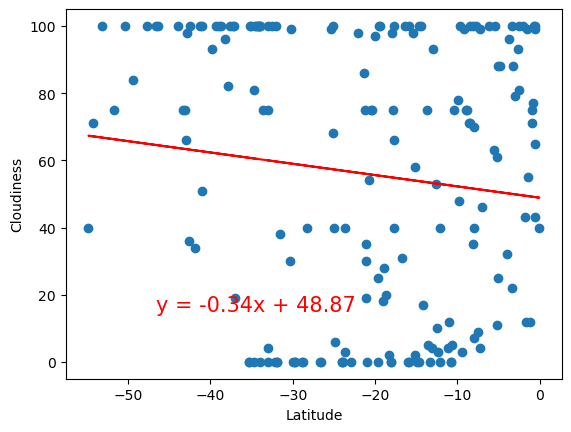

In [20]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Latitudes and percentages of cloudiness have very weak correlations, reglardless of the hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.21663379215562698


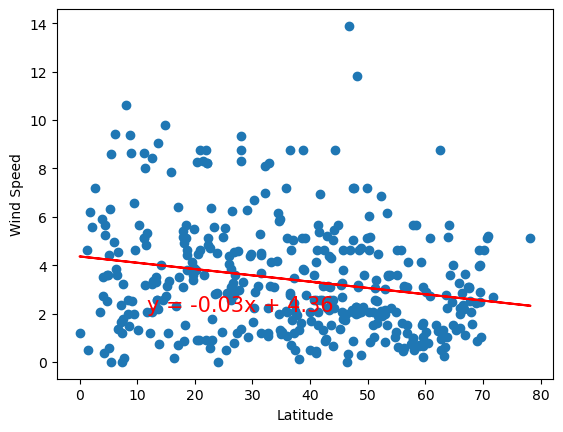

In [21]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.09155004829581641


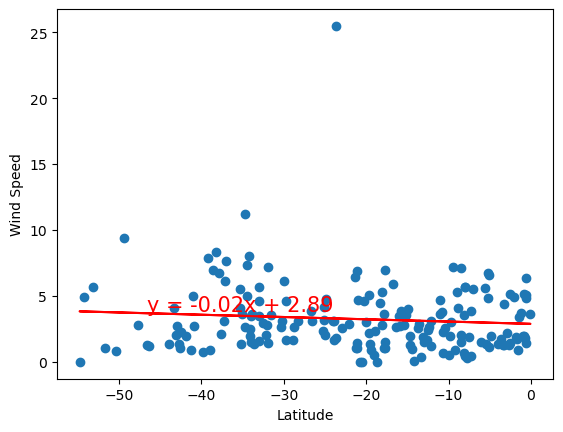

In [22]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Latitudes and wind speeds have very weak correlations, reglardless of the hemisphere.